In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#converting data into numpy array
data = np.array(data)
np.random.shuffle(data)

In [5]:
#splitting data in training and testing
m,n = data.shape

#Test data and taking transpose of the array
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

#train data
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.



In [6]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    
    return W1, b1, W2, b2

In [7]:
def ReLU(Z):
    return np.maximum(Z,0)

def deriv_ReLU(Z):
    return Z>0

In [8]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [9]:
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

    

In [10]:
def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [11]:
def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2
    

In [12]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2
                  
    

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum((predictions == Y) / Y.size)

In [14]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params( W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10 ==0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.10)

Iteration:  0
[6 3 6 ... 6 6 6] [7 6 7 ... 0 5 5]
Accuracy:  0.09453658536585367
Iteration:  10
[7 2 9 ... 9 9 3] [7 6 7 ... 0 5 5]
Accuracy:  0.15258536585365853
Iteration:  20
[6 2 9 ... 9 9 3] [7 6 7 ... 0 5 5]
Accuracy:  0.25026829268292683
Iteration:  30
[6 2 6 ... 0 9 3] [7 6 7 ... 0 5 5]
Accuracy:  0.3172439024390244
Iteration:  40
[6 2 6 ... 0 9 3] [7 6 7 ... 0 5 5]
Accuracy:  0.3724146341463415
Iteration:  50
[6 2 6 ... 0 9 3] [7 6 7 ... 0 5 5]
Accuracy:  0.4246829268292682
Iteration:  60
[9 6 7 ... 0 9 3] [7 6 7 ... 0 5 5]
Accuracy:  0.4760243902439024
Iteration:  70
[9 6 7 ... 0 5 3] [7 6 7 ... 0 5 5]
Accuracy:  0.5209756097560975
Iteration:  80
[9 6 7 ... 0 5 3] [7 6 7 ... 0 5 5]
Accuracy:  0.558390243902439
Iteration:  90
[9 6 7 ... 0 5 3] [7 6 7 ... 0 5 5]
Accuracy:  0.592170731707317
Iteration:  100
[9 6 7 ... 0 5 3] [7 6 7 ... 0 5 5]
Accuracy:  0.622780487804878
Iteration:  110
[9 6 7 ... 0 5 3] [7 6 7 ... 0 5 5]
Accuracy:  0.65
Iteration:  120
[9 6 7 ... 0 5 3] [7 6 7 

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  4


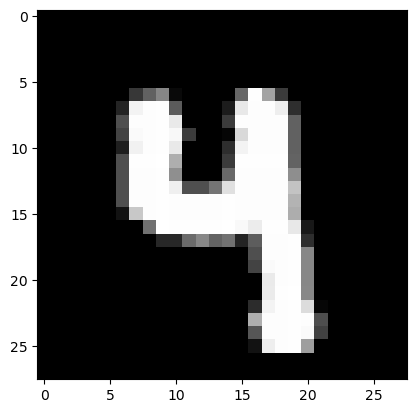

In [33]:
test_prediction(3370, W1, b1, W2, b2)

In [21]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[9 6 1 8 8 9 9 5 3 2 5 8 7 5 5 7 2 4 0 9 2 9 9 1 5 0 0 4 5 4 2 6 7 3 6 9 1
 5 9 9 4 7 4 6 6 4 2 9 1 9 5 9 9 4 7 4 9 8 9 2 6 7 0 5 6 4 4 0 2 7 4 9 1 8
 3 0 7 0 7 3 1 2 5 7 1 6 8 4 8 9 0 0 0 6 1 8 8 8 6 4 3 2 5 0 1 1 5 9 6 2 6
 0 2 6 3 6 2 4 1 9 0 6 6 5 0 1 2 2 5 8 4 7 0 1 1 9 7 6 4 0 2 3 8 7 0 3 6 9
 6 3 7 7 8 5 7 4 1 4 2 3 1 0 8 2 1 0 4 5 1 3 8 3 2 3 6 8 0 1 8 7 0 2 6 9 9
 1 4 0 1 7 9 6 1 1 5 5 6 4 0 2 1 1 1 8 5 7 2 0 4 7 4 2 5 6 2 6 1 3 3 3 0 6
 3 8 6 0 9 8 2 3 6 0 5 4 9 7 1 8 7 9 5 9 6 5 4 6 6 5 7 9 8 2 5 0 9 6 7 3 1
 9 9 6 4 0 9 9 7 9 3 2 3 3 9 6 1 2 4 7 7 2 2 1 9 7 3 2 5 5 1 2 6 0 3 0 7 5
 5 8 0 3 6 9 4 1 3 5 3 0 0 6 9 9 5 8 4 7 6 0 7 8 1 3 3 4 3 4 1 1 3 7 1 8 5
 9 3 7 4 6 0 3 6 4 4 0 3 5 1 6 1 1 9 7 0 8 8 8 0 0 8 1 0 2 3 9 4 8 7 0 0 7
 6 0 2 8 8 2 4 0 5 5 6 6 1 9 2 4 9 1 7 5 3 8 2 3 8 7 5 8 1 8 4 4 9 5 4 3 0
 7 6 9 6 5 4 3 3 9 6 1 8 3 6 8 3 8 0 6 4 1 9 3 4 7 2 6 7 6 6 5 0 3 7 0 8 1
 7 0 7 4 1 7 3 5 0 1 9 5 6 2 8 5 3 3 2 7 6 9 7 8 3 4 9 8 7 7 9 7 6 1 6 0 2
 9 3 5 9 0 0 8 8 7 8 8 3 

0.8360000000000003